<a href="https://colab.research.google.com/github/mcppp/Intro2DL/blob/main/Copy_of_%5BSKELETON%5D_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### USE ONLY THESE PACKAGES ###
import os
import csv
import json
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### Upload the lyrics_dataset.zip in the colab's folder first !

In [2]:
!unzip lyrics_dataset.zip


Archive:  lyrics_dataset.zip
   creating: lyrics_dataset/
  inflating: lyrics_dataset/adele.txt  
  inflating: lyrics_dataset/al-green.txt  
  inflating: lyrics_dataset/alicia-keys.txt  
  inflating: lyrics_dataset/amy-winehouse.txt  
  inflating: lyrics_dataset/beatles.txt  
  inflating: lyrics_dataset/bieber.txt  
  inflating: lyrics_dataset/bjork.txt  
  inflating: lyrics_dataset/blink-182.txt  
  inflating: lyrics_dataset/bob-dylan.txt  
  inflating: lyrics_dataset/bob-marley.txt  
  inflating: lyrics_dataset/britney-spears.txt  
  inflating: lyrics_dataset/bruce-springsteen.txt  
  inflating: lyrics_dataset/bruno-mars.txt  
  inflating: lyrics_dataset/cake.txt  
  inflating: lyrics_dataset/dickinson.txt  
  inflating: lyrics_dataset/disney.txt  
  inflating: lyrics_dataset/dj-khaled.txt  
  inflating: lyrics_dataset/dolly-parton.txt  
  inflating: lyrics_dataset/dr-seuss.txt  
  inflating: lyrics_dataset/drake.txt  
  inflating: lyrics_dataset/eminem.txt  
  inflating: lyrics_data

### Do not change this seed number

In [3]:
np.random.seed(1)
torch.manual_seed(1)


In [4]:
## Use to construct dataset and dataloader!!!!
## Use below code to train your model with all lyrics
lyrics = list()
for txt_file in os.listdir('./lyrics_dataset'):
    if txt_file[0] != '.':
        target_txt = os.path.join('./lyrics_dataset', txt_file)
        f = open(target_txt, 'r')
        curr_lyrics = f.readlines()
        for i in range(len(curr_lyrics)):
            curr_lyrics[i] = curr_lyrics[i].lower()
        curr_lyrics = list(set(curr_lyrics))
        lyrics += curr_lyrics
# print(len(lyrics)) #how many lines



#1: deleting everything but alphanumerics and blank spaces
lyrics1=lyrics[:50]  #for short example
stripped = []
for i in lyrics1:
  stripped.append ( ''.join(ch for ch in i if ch.isalnum() or ch == ' ').split())

# a = list()
# a = stripped

# # type(a[0]) #checking that self.trimmed_lyrics is a list with lists inside of it




# #2: making vocabulary of unique words
# unique = list()
# for x in a:  
#     for i in x:
#       if i not in unique:
#         unique.append(i)
# # print(unique)


# ##3: freq dict
# frequency = dict()
# for x in a:
#   for i in x:
#       if i not in frequency:
#         frequency[i] = 0 
#       frequency[i] += 1
# # print(frequency)

# ##4:
# idx=4 #which sentence we want
# target_lyrics = a[idx] #chosen sentence separated in words
# print(target_lyrics)
# # print(len(target_lyrics))
# target_word = np.random.choice(target_lyrics)

# # random_iterator = iter(target_lyrics) #creating iterator
# # target_word = next(random_iterator) #randomly choose target word in sentence

# target_idx = target_lyrics.index(target_word) #index of target word
# # print(target_idx)

# sample = dict()
# sample['pairs'] = list()

# ###CHOSEN MANUALLY TO TEST
# target_idx =3
# target_word=target_lyrics[target_idx]

# len_sentence = len(target_lyrics)
# print(len_sentence)

# window = 2
# window_len = list(range(1, window+1, 1))
# print(window_len)

# # for i in window_len:
# #   if (target_idx+i)<=(len_sentence-1):
# #     sample['pairs'].append([target_idx,target_idx + i])
# #   if (target_idx - i) >= 0:
# #     sample['pairs'].append([target_idx, target_idx - i])

# # print(sample['pairs'])
# print(a)
# print(unique)

# for i in window_len:
#   if (target_idx+i)<=(len_sentence-1):
#     orig_idx = unique.index(target_word)
#     next_idx = unique.index((target_lyrics[target_idx + i]))
#     sample['pairs'].append((orig_idx,next_idx))
#   if (target_idx - i) >= 0:
#     orig1_idx = unique.index(target_word)
#     next1_idx = unique.index((target_lyrics[target_idx - i]))
#     sample['pairs'].append((orig1_idx,next1_idx))

# print(sample['pairs'])


# # sample['pairs'][0] = (2,1)

# # target_idx =1
# # target_word = target_lyrics[target_idx]
# # print(target_word)







# # Use below code to train your model with specific artist's lyrics
# target_txt = './lyrics_dataset/lady-gaga.txt'
# f = open(target_txt, 'r')
# lyrics = f.readlines()
# for i in range(len(lyrics)):
#     lyrics[i] = lyrics[i].lower()
# lyrics = list(set(lyrics))

# # #"lyrics" is a list of strings.
# for l in lyrics:
#     print(l)

In [ ]:
# #HELP EXAMPLES

# print(lyrics[103])
# trimmed_lyrics = list()
# trimmed_lyrics.append(['chola', 'or', 'orient', 'made'])

# trimmed_lyrics.append(['me', 'or', 'you'])
# # print(trimmed_lyrics) #how we want it to look like (eliminate symbols too)
# # vocabulary= ['chola', 'or', 'orient', 'made','me', 'you'] #vocab list with unique words

# # frequency=dict() #how many times a word appears
# # frequency['chola'] = 1
# # frequency['or'] = 2
# # frequency['orient'] = 1
# # frequency['made'] = 1
# # frequency['me'] = 1
# # frequency['you'] = 1
# # print(frequency)

# #MUST DO 4
# print(trimmed_lyrics[0])  #first list of words
# target_lyrics = trimmed_lyrics[0]
# targed_idx =1
# target_word = target_lyrics[target_idx]
# print(target_word)
# vocabulary= ['chola', 'or', 'orient', 'made','me', 'you'] #vocab list with unique words
#     #          0        1       2        3     4     5
# sample = dict()
# sample['pairs'] = list()
# sample['pairs'] = [(1,2),(1,0)] #[('or','orient'),('or', 'chola')] #  needs to be converted into integer
#                  #(targe word's index, context word's index)
# #your code here


but she got that dumb ass

['chola', 'or', 'orient', 'made']
made


In [5]:
#we wanna get lyrics and eliminate commas, brackets, etc.

class lyricsDataset(Dataset): # 12 points
    def __init__(self, lyrics, window_len):
        self.lyrics = lyrics
        self.window_len = window_len #how many words we see before and after target word
        # window len means, that, if i-th word is target
        # you would consider i-window_len ~ i+window_len words as context words

        ##--------------write below-------------## <--- do not erase this afterwards
        self.trimmed_lyrics = list()    
        self.vocabulary = list()
        self.frequency = dict()
        # your code in here
        
        #1: Eliminating everything but alphanumerics and blank spaces + splitting by blank spaces
        stripped = []
        for i in lyrics:
          stripped.append ( ''.join(ch for ch in i if ch.isalnum() or ch == ' ').split())
        self.trimmed_lyrics = stripped



        #2: Making vocabulary of unique words
        unique = list()
        for x in self.trimmed_lyrics:  
          for i in x:
            if i not in unique:
              unique.append(i)
        self.vocabulary = unique

        #3: Creating frequency dict
        for x in self.trimmed_lyrics:
          for i in x:
            if i not in self.frequency:
              self.frequency[i] = 0 
            self.frequency[i] += 1
        
    
        ##--------------write above-------------## <--- do not erase this
        
        ### MUST TO-DO 1. (+3) -> self.trimmed_lyrics
        # for strings in self.lyrics, 
        # (+2) write a code to eliminate every character except for alphabet, number, and space (" ")
        ### for example, - + ? ! ' " [ ] ( ) <- char like this should be excluded. 
        # (+1) after that, split each string with respect to the space.
        ### If proprocessed string is "hello hello hello", 
        ### a list ['hello', 'hello', 'hello'] should be generated.
        ### Then, put that list into the self.trimmed_lyrics.
        ### self.trimmed_lyrics needs to be a LIST which has LIST as element.

        ### MUST TO-DO 2. (+2) -> self.vocabulary
        # (+2) Put all words(string) in self.trimmed_lyrics to the self.vocabulary. 
        ### In self.vocabulary, each word needs to be unique.
        ### which means, this list (self.vocabulary) should not have duplicated elements. 
        ### self.vocabulary needs to be a LIST which contains unique words in self.trimmed_lyrics
        ### If your code contains duplicated words, you would not get the point.
        ### If there is a word that are neglected from self.trimmed_lyrics, you would not get the point.

        ### MUST TO-DO 3. (+2) -> self.frequency
        # (+2) In self.frequency, Record how many times each word in self.vocabulary 
        ###                              appears in self.trimmed_lyrics.
        ### For example, if "love" appears 100 times in self.trimmed_lyrics,
        ### it should be: self.frequency["love"] = 100

    def __len__(self):
        # DO NOT TOUCH BELOW. JUST USE BELOW CODE FOR YOUR __len__ 
        return len(self.trimmed_lyrics)
        # DO NOT TOUCH ABOVE. JUST USE ABOVE CODE FOR YOUR __len__ 

    def __getitem__(self, idx):
        ### MUST TO-DO 4. (+5) --> sample (bring out positive samples from lyrics inside this dataset)
        ##--------------write below-------------##
        sample = dict()
        sample['pairs'] = list()
        
        # your code here

        ##Q : recheck if next () works well
              
        # random_iterator = iter(self.trimmed_lyrics[idx]) #creating iterator
        # target_word = next(random_iterator) #randomly choose target word in sentence

        if (len(self.trimmed_lyrics[idx])<1):
          return sample

        

        target_word = np.random.choice(self.trimmed_lyrics[idx])

        target_idx = self.trimmed_lyrics[idx].index(target_word) #index of target word  
                       
        len_sentence = len(self.trimmed_lyrics[idx]) #check how many words in selected line (sentence)
        
        window_len = list(range(1, self.window_len+1, 1)) #range of window lengths to check   

           
        for i in window_len:
          if (target_idx+i)<=(len_sentence-1):
            orig_idx = self.vocabulary.index(target_word)
            next_idx = self.vocabulary.index((self.trimmed_lyrics[idx][target_idx + i]))
            sample['pairs'].append((orig_idx,next_idx))
          if (target_idx - i) >= 0:
            orig1_idx = self.vocabulary.index(target_word)
            next1_idx = self.vocabulary.index((self.trimmed_lyrics[idx][target_idx - i]))
            sample['pairs'].append((orig1_idx,next1_idx))
          
        # print(sample['pairs'])
        return sample



        

In [6]:
### DO NOT TOUCH BELOW. JUST USE THESE LINES.
### PENALTY (-5) CAN BE APPLIED IF YOUR CODE DOES NOT WORK FOR VARIOUS VALUES OF WINDOW_LEN
dataset = lyricsDataset(lyrics, 3)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
### DO NOT TOUCH ABOVE. JUST USE THESE LINES.

In [ ]:
example = next(iter(dataloader)) #getting one example from dataloader
example1 = next(iter(dataloader))
print(example['pairs'])
print(example1['pairs'])

[[tensor([1318]), tensor([2578])], [tensor([1318]), tensor([24])], [tensor([1318]), tensor([78])], [tensor([1318]), tensor([547])]]
[[tensor([151]), tensor([7544])], [tensor([151]), tensor([162])], [tensor([151]), tensor([9824])], [tensor([151]), tensor([9])]]


In [20]:
class Word2Vec(nn.Module):# 15 points
  
    def __init__(self, num_vocabs, embed_dim = 300): ## do not change 'embed_dim' value.
        ### MUST TO-DO 5 : (+5)
        ##--------------write below-------------##
        # your code here
        super(Word2Vec, self).__init__()  #needed so that things defined in nn.Module are inherited by our class

        #define sizes of network
        self.num_vocabs = num_vocabs
        self.embed_dim = embed_dim
         #define layers of network
        self.layer1 = nn.Linear(self.num_vocabs, self.embed_dim)
        self.layer2 = nn.Linear(self.num_vocabs, self.embed_dim)       


        ##--------------write above-------------##
        # Define a model which can map word's integer index value to word embedding.
        
    def forward(self, pairs):
      '''
      input : pairs - one tuple of (target word index, context word index)
      '''
      ### MUST TO DO 6 : (+10)
        ##--------------write below-------------##
        # your code here
    
      #hot encoding input words (target + context)
      target_idx = pairs[0].long() #corresponding idx of target word from vocab
      context_idx = pairs[1].long() #corresponding idx of context word from vocab
 
      one_hot_target = torch.zeros(self.num_vocabs)
      one_hot_target[target_idx] = 1 #now target word hot encoded
        
      one_hot_context = torch.zeros(self.num_vocabs)
      one_hot_context[context_idx] = 1 #now context word hot encoded

      
      #layers
      target_embed = self.layer1(one_hot_target.to(device))
      context_embed = self.layer2(one_hot_context.to(device)) 


      return target_embed, context_embed
        ##--------------write above-------------##
        # return the embedding of target word and context word.
        # i.e., return target_embed, context_embed


In [21]:
### DO NOT TOUCH BELOW. JUST USE THESE LINES. MAKE YOUR CODE WORK WITH THESE LINES
model = Word2Vec(len(dataset.vocabulary)) #the arg is num_vocabulary
optimizer = torch.optim.AdamW(model.parameters())
device = 'cuda'

### DO NOT TOUCH ABOVE. JUST USE THESE LINES. MAKE YOUR CODE WORK WITH THESE LINES
### USE THIS GIVEN OPTIMIZER.

In [ ]:
print(model)

Word2Vec(
  (layer1): Linear(in_features=30298, out_features=300, bias=True)
  (layer2): Linear(in_features=30298, out_features=300, bias=True)
)


In [ ]:
out = model(example['pairs'][0])
print(len(out)) #target_embed and context_embed returned

passed pair:  [tensor([72]), tensor([754])]
num_vocabs:  30298
one_hot_target.shape:  torch.Size([30298])
target_embed.shape:  torch.Size([300])
one_hot_context.shape:  torch.Size([30298])
context_embed.shape:  torch.Size([300])
2


In [ ]:
#Creating negative samples 

nsample =dict()
nsample['pairs']=list()
nsample1 =dict()
nsample1['pairs'] = list()

nembeddings1= dict()
nembeddings1['pairs']=list()
nembeddings1['dot']=list()

nembeddings2= dict()
nembeddings2['pairs']=list()
nembeddings2['dot']=list()

denom =list()

# print(len(example1['pairs']))
# print(len(example['pairs']))
# print(example1['pairs'])
# print(example['pairs'])

for idx, j in enumerate(example1['pairs']):
  # print((example['pairs'][0][0], example1['pairs'][idx][1]))
  nsample1['pairs'].append((example['pairs'][0][0], example1['pairs'][idx][1]))

for idx, i in enumerate(example['pairs']):
  nsample['pairs'].append((example1['pairs'][0][0], example['pairs'][idx][1]))

# for idx, i in enumerate(nsample1['pairs']):
#       target_embed, context_embed = model(nsample1['pairs'][idx])
#       nembeddings1['pairs'].append((target_embed,context_embed))
#       target_embed=target_embed.detach().numpy()
#       context_embed=context_embed.detach().numpy()
#       nembeddings1['dot'].append(np.dot(target_embed, context_embed))
#       denom.append(np.dot(target_embed, context_embed))

# for idx, i in enumerate(nsample['pairs']):
#       target_embed, context_embed = model(nsample['pairs'][idx])
#       nembeddings2['pairs'].append((target_embed,context_embed))
#       target_embed=target_embed.detach().numpy()
#       context_embed=context_embed.detach().numpy()
#       nembeddings2['dot'].append(np.dot(target_embed, context_embed))
#       denom.append(np.dot(target_embed, context_embed))


# print(nembeddings1['dot'])
# print(nembeddings2['dot'])
# print(denom)

# print(np.exp(denom))
# d = np.sum(np.exp(denom))
# print(d)

# prob = np.divide((np.exp(denom)), d)
# print(prob)

# y = np.ones(8,int)
# m = y.shape[0]

# part = np.multiply(y, -np.log(prob))
# loss = np.sum(part) / m

# a = list()

# a.append(0)
# a.append (2)
# print(a)

# print (a)

# print(example['pairs'])
# print(example1['pairs'])
# print()
# print(nsample['pairs'])
# print(nsample1['pairs'])

In [45]:
def train(model, optimizer, sample_1, sample_2): # 13 points
    ### MUST TO DO 6 : (+12)
    ##--------------write below-------------##
    model.train()
    model = model.to(device)
    optimizer.zero_grad()
    # your code here

    # sample_1['pairs']=torch.Tensor(sample_1['pairs']).to(device)
    # sample_2['pairs']=torch.Tensor(sample_2['pairs']).to(device)

    ##deleting empty lines - Option 2
    if (len(sample_1['pairs'])<=1 or len(sample_2['pairs'])<=1 ):
      loss = 0
      return loss

    # #deleting empty lines - Option 1
    # while (len(sample_1['pairs'])<1):
    #   sample_1 = next(iter(dataloader))
    # while (len(sample_2['pairs'])<1):
    #   sample_2 = next(iter(dataloader))


    #creating negative samples
    nsample_1 = dict()
    nsample_1['pairs']=list()
    nsample_2 =dict()
    nsample_2['pairs']=list()

    # print(sample_1['pairs'])
    # print(len(sample_1['pairs']))
    # print(sample_2['pairs'])
    # print(len(sample_2['pairs']))

    for idx, j in enumerate(sample_1['pairs']):
      nsample_2['pairs'].append((sample_2['pairs'][0][0], sample_1['pairs'][idx][1]))

    for idx, i in enumerate(sample_2['pairs']):
      nsample_1['pairs'].append((sample_1['pairs'][0][0], sample_2['pairs'][idx][1]))


    #applying embedding to all tuples in the samples
    # target_embed, context_embed = model((target, context))
    embeddings_1 = dict()
    embeddings_2 = dict()
    nembeddings_1 = dict()
    nembeddings_2 = dict()

    embeddings_1['pairs'] = list()
    embeddings_2['pairs'] = list()
    nembeddings_1['pairs'] = list()
    nembeddings_2['pairs'] = list()
    embeddings_1['dot'] = list()
    embeddings_2['dot'] = list()
    nembeddings_1['dot'] = list()
    nembeddings_2['dot'] = list()

    denominator = list()
    labels = []
    # for idx, i in enumerate(sample_1['pairs']):
    #   target_embed, context_embed = model(sample_1['pairs'][idx])
    #   embeddings_1['pairs'].append((target_embed,context_embed))
    #   target_embed=target_embed.detach().numpy()
    #   context_embed=context_embed.detach().numpy()
    #   embeddings_1['dot'].append(np.dot(target_embed, context_embed))
    #   denominator.append(np.dot(target_embed, context_embed))
    #   labels.append(1)

    # for idx, i in enumerate(sample_2['pairs']):
    #   target_embed, context_embed = model(sample_2['pairs'][idx])
    #   embeddings_2['pairs'].append((target_embed,context_embed))
    #   target_embed=target_embed.detach().numpy()
    #   context_embed=context_embed.detach().numpy()
    #   embeddings_2['dot'].append(np.dot(target_embed, context_embed))
    #   denominator.append(np.dot(target_embed, context_embed))
    #   labels.append(1)
     

    # for idx, i in enumerate(nsample_1['pairs']):
    #   target_embed, context_embed = model(nsample_1['pairs'][idx])
    #   nembeddings_1['pairs'].append((target_embed,context_embed))
    #   target_embed=target_embed.detach().numpy()
    #   context_embed=context_embed.detach().numpy()
    #   nembeddings_1['dot'].append(np.dot(target_embed, context_embed))
    #   denominator.append(np.dot(target_embed, context_embed))
    #   labels.append(0)

    # for idx, i in enumerate(nsample_2['pairs']):
    #   target_embed, context_embed = model(nsample_2['pairs'][idx])
    #   nembeddings_2['pairs'].append((target_embed,context_embed))
    #   target_embed=target_embed.detach().numpy()
    #   context_embed=context_embed.detach().numpy()
    #   nembeddings_2['dot'].append(np.dot(target_embed, context_embed))
    #   denominator.append(np.dot(target_embed, context_embed))
    #   labels.append(0)


    for idx, i in enumerate(sample_1['pairs']):
      a = sample_1['pairs'][idx][0].float().to(device)
      # print(a)
      b = sample_1['pairs'][idx][1].float().to(device)
      # print(b)
      target_embed, context_embed = model((a,b))
      # print(type(target_embed))
      embeddings_1['pairs'].append((target_embed,context_embed))
      # target_embed=target_embed.detach().numpy()
      # context_embed=context_embed.detach().numpy()
      embeddings_1['dot'].append(torch.dot(target_embed, context_embed))
      denominator.append(torch.dot(target_embed, context_embed))
      labels.append(1)

    for idx, i in enumerate(sample_2['pairs']):
      a = sample_2['pairs'][idx][0].float().to(device)
      b = sample_2['pairs'][idx][1].float().to(device)
      target_embed, context_embed = model((a,b))
      embeddings_2['pairs'].append((target_embed,context_embed))
      # target_embed=target_embed.detach().numpy()
      # context_embed=context_embed.detach().numpy()
      embeddings_2['dot'].append(torch.dot(target_embed, context_embed))
      denominator.append(torch.dot(target_embed, context_embed))
      labels.append(1)
     

    for idx, i in enumerate(nsample_1['pairs']):
      a = nsample_1['pairs'][idx][0].float().to(device)
      b = nsample_1['pairs'][idx][1].float().to(device)
      target_embed, context_embed = model((a,b))
      nembeddings_1['pairs'].append((target_embed,context_embed))
      # target_embed=target_embed.detach().numpy()
      # context_embed=context_embed.detach().numpy()
      nembeddings_1['dot'].append(torch.dot(target_embed, context_embed))
      denominator.append(torch.dot(target_embed, context_embed))
      labels.append(0)

    for idx, i in enumerate(nsample_2['pairs']):
      a = nsample_2['pairs'][idx][0].float().to(device)
      b = nsample_2['pairs'][idx][1].float().to(device)
      target_embed, context_embed = model((a,b))
      nembeddings_2['pairs'].append((target_embed,context_embed))
      # target_embed=target_embed.detach().numpy()
      # context_embed=context_embed.detach().numpy()
      nembeddings_2['dot'].append(torch.dot(target_embed, context_embed))
      denominator.append(torch.dot(target_embed, context_embed))
      labels.append(0)

    labels = torch.Tensor(labels)
    labels = labels.long().to(device)

    
    denominator = torch.Tensor(denominator)

    #probability formula
    denom = torch.sum(torch.exp(denominator)) #summation of exponential scores
    # print('denom ', denom)
    
    prob = torch.divide((torch.exp(denominator)), denom) #probability elementwise

    # #Option1    
    # m = len(labels) #how many labels (how many elements)
    # part = np.multiply(labels, -np.log(prob))
    # loss = np.sum(part) / m
    

    #Option2
    #https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
    loss = []
    for idx, i in enumerate(labels):
      if  labels[idx]== 1:
        loss.append(-np.log(prob[idx]))
      else:
        loss.append(-np.log(1 - prob[idx]))

    loss = np.sum(loss) / len(labels)

    optimizer.step()

    return loss
    # return the current loss value
    ##--------------write above-------------##

    ## sample_1 will contain positive (target_1, context_1) tuples
    ## sample_2 will contain another positive (target_2, context_2) tuples
    ## But for the negative sampling, we need negative (target, context) tuples.
    ## NEGATIVE TUPLES can be generated by (target_1, context_2), (target_2, context_1)
    ## (+5) Generate and give positive & negative tuples for model's input
    ##### Then, you would get : target_embed, context_embed = model((target, context)).
    ## (+4) calculate the distance between target_embed and context_embed by DOT PRODUCT  #see slides
    ## (+4) calculate the loss based on that distance, and optimize the model
    ####    Label positive tuples as class '1', otherwise as class '0'
    ####    You can also use sigmoid function rather than the softmax function.
    ####    At the end, you must return the current loss value.

In [ ]:
for sample in tqdm(dataloader):
  print(sample)

In [46]:
### DO NOT TOUCH BELOW. JUST USE THESE LINES. MAKE YOUR CODE WORK THESE CODES.
### PENALTY (-5) WILL BE GIVEN WHEN YOUR CODE RAISES AN ERROR DURING EPOCH.
### YOUR TRAINING NEEDS TO BE PERFORMED WITH VARIOUS .TXT FILES.
max_epoch = 1
for epoch in range(max_epoch):
    total_loss = 0.0
    cnt = 0
    for sample in tqdm(dataloader):
        if cnt > 0:
            curr_loss = train(model, optimizer, sample, prev_sample)
            # print(curr_loss)
            total_loss += curr_loss / len(dataloader)    
        prev_sample = sample
        cnt += 1
        if cnt % 200 == 0:
            print('[EPOCH {}] SAMPLED TRAIN LOSS : {}'.format(epoch, curr_loss))
    print('[EPOCH {}] TOTAL LOSS : {}'.format(epoch, total_loss))

[EPOCH 0] SAMPLED TRAIN LOSS : 1.473786883884006
[EPOCH 0] SAMPLED TRAIN LOSS : 1.418585181236267
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4737457699245877
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4185140132904053
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4737464057074652
[EPOCH 0] SAMPLED TRAIN LOSS : 1.3565949031284876
[EPOCH 0] SAMPLED TRAIN LOSS : 1.285959800084432
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4736999935574002
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4737727906968858
[EPOCH 0] SAMPLED TRAIN LOSS : 1.3566247395106725
[EPOCH 0] SAMPLED TRAIN LOSS : 1.5235185623168945
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4737493726942275
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4737823274400499
[EPOCH 0] SAMPLED TRAIN LOSS : 1.5688282359730115
[EPOCH 0] SAMPLED TRAIN LOSS : 1.6103153228759766
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4737665388319228
[EPOCH 0] SAMPLED TRAIN LOSS : 1.2859641710917156
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4737154642740886
[EPOCH 0] SAMPLED TRAIN LOSS : 1.5235158920288085
[EPOCH 0] SAMPLED TRAIN LOSS : 1.4185709953308105
[EP

In [68]:
### MUST TO DO 7 : (+10)
##--------------write below-------------##
# your code here
embedding_=model.layer1.weight.detach().cpu().numpy()
embedding=np.transpose(embedding_)
print(len(dataset.vocabulary)) # N : amount of words in vocabulary (amount of unique words in dataset)
                               # D : 300 (chosen dimension to embed in word2vec), dimension of vector embedding of the words
                               
print(embedding.shape) # NxD : matrix of embeddings of all words 

##--------------write above-------------##
## (+10) bring your word embedding as a numpy array "embedding"
#### "embedding" should be N by D array, 
#### where N is the number of vocabularies, and D is the dimension of the word embedding. D is 300 in this code
#### embedding[i, :] should be word embedding of dataset.vocabulary[i]

30298
(30298, 300)


In [69]:
### JUST USE THESE LINES. MAKE YOUR CODE WORK THESE CODES. (check if visual makes sense , see graph in slides )
reducer = PCA(n_components=2)
# or try use
# reducer = TSNE(n_components=2, verbose=1)
reduce_results = reducer.fit_transform(embedding) #reducing embedding matrix to 2 principal components (out of the 300 from embedding)
print(reduce_results.shape)

(30298, 2)


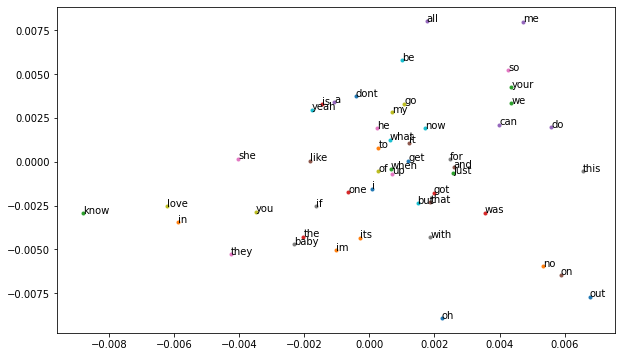

In [72]:
### DO NOT TOUCH BELOW. JUST USE THESE LINES. MAKE YOUR CODE WORK THESE CODES.
top_k = 50
sort_idx = np.argsort(list(dataset.frequency.values()))[::-1] #sort indices from most to least frequent
sort_idx = sort_idx[:top_k]  #choose 50 most frequent
frequent_vocabs = [list(dataset.frequency.keys())[si] for si in sort_idx]
plt.figure(figsize=(10, 6))

for idx, vocab in enumerate(dataset.vocabulary):
    if vocab in frequent_vocabs:
        plt.plot(reduce_results[idx, 0], reduce_results[idx, 1], '.') #plotting 2 principal components of the word in vocabulary (if this word among top 50 most frequent)
        plt.text(reduce_results[idx, 0], reduce_results[idx, 1], vocab)

In [73]:
### DO NOT TOUCH BELOW. JUST USE THESE LINES. MAKE YOUR CODE WORK THESE CODES.
min_dist = 10000000
target_word = 'i'
for idx, vocab in enumerate(dataset.vocabulary):
    if vocab != target_word:
        distance = np.linalg.norm(embedding[dataset.vocabulary.index(target_word)] - embedding[idx])
        min_dist = min(distance, min_dist)
        if min_dist == distance:
            nearest_to_target = vocab
print('"{}" is nearest to "{}"'.format(target_word, nearest_to_target))

"i" is nearest to "dillingers"
